In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn import tree


import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Wczytajmy dane
url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df = pd.read_csv(url)

### Jak zmiana parametru wpływa na model

In [24]:
y=df[['cnt']]
X=df[['atemp','hum','windspeed']]

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)

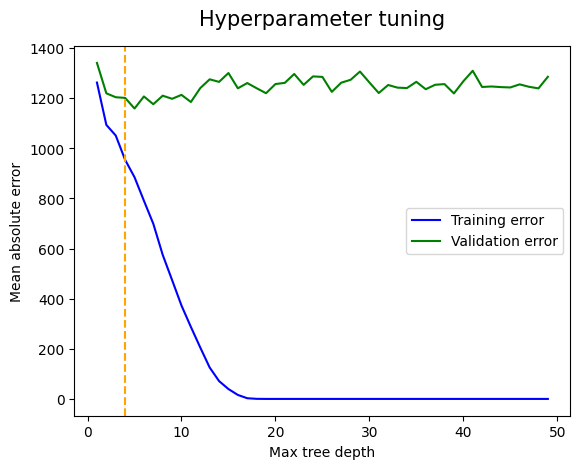

In [26]:
max_depths=range(1,50)
training_error=[]
validation_error=[]
for max_depth in max_depths:
  model_1=tree.DecisionTreeRegressor(max_depth=max_depth)
  model_1.fit(X_train,y_train)

  pred_1=model_1.predict(X_train)
  training_error.append(mean_absolute_error(y_train,pred_1))

  pred_2=model_1.predict(X_val)
  validation_error.append(mean_absolute_error(y_val,pred_2))

plt.plot(max_depths,training_error,color='blue',label='Training error')
plt.plot(max_depths,validation_error,color='green',label='Validation error')
plt.xlabel('Max tree depth')
plt.axvline(x=np.argmin(validation_error),color='orange',linestyle='--')

plt.ylabel('Mean absolute error')
plt.title('Hyperparameter tuning',pad=15,size=15)
plt.legend()                                     
                                     

### Kroswalidacja w praktyce

In [30]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, random_state=8, shuffle=True)
model = tree.DecisionTreeRegressor(random_state=8, max_depth=2)
score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print("Cross validation score: ", -score)
print("Cross validation avg score: ", -score.mean())

Cross validation score:  [1187.18138527 1023.72989833 1138.59737162 1297.80030458 1239.9914492
 1066.42548067 1058.21113291 1050.7323255  1206.55762563 1306.24518702]
Cross validation avg score:  1157.547216072077


In [33]:
kf = KFold(n_splits=10, random_state=8, shuffle=True)
model = tree.DecisionTreeRegressor(random_state=8, max_depth=3)
score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

print("Cross validation score: ", -score)
print("Cross validation avg score: ", -score.mean())

Cross validation score:  [1211.229973   1078.6495912  1140.53547289 1306.70045803 1253.52395166
 1020.96789432 1065.63380347 1107.92667072 1235.64781943 1321.11330313]
Cross validation avg score:  1174.192893784281


In [44]:
res=[]
for max_depth in range(1,10):
  kf=KFold(n_splits=10,random_state=8,shuffle=True)
  model=DecisionTreeRegressor(max_depth=max_depth)
  score=cross_val_score(model,X_train,y_train,cv=kf,scoring='neg_mean_absolute_error')
  res.append(-score.mean())

In [45]:
pd.concat([pd.Series(range(1,10)),pd.Series(res)],axis=1)

,0,1
0,1,1287.746052
1,2,1157.547216
2,3,1174.192894
3,4,1155.245417
4,5,1135.376290
5,6,1163.825699
6,7,1170.219803
7,8,1203.650612
8,9,1255.897884


In [46]:
np.argmin(res)+1

5

In [47]:
model=tree.DecisionTreeRegressor(random_state=8,max_depth=np.argmin(res)+1)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=8)

In [48]:
y_pred=model.predict(X_test)
mean_absolute_error(y_test,y_pred)

1242.888727604157

In [50]:
from sklearn.model_selection import GridSearchCV
model=DecisionTreeRegressor()

In [51]:
gs=GridSearchCV(model,
                param_grid={'max_depth':range(1,10),
                            'min_samples_split':range(10,60,10)},
                cv=10,
                scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [53]:
print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 9, 'min_samples_split': 50}
1106.1847521799743


In [54]:
y_pred=gs.predict(X_test)
mean_absolute_error(y_test,y_pred)

1250.3780601615883

In [63]:
from sklearn.model_selection import LeaveOneOut

In [64]:
model=DecisionTreeRegressor()
res_GSLOO=GridSearchCV(model,
                       param_grid={'max_depth':range(1,10),
                                   'min_samples_split':range(10,60,10)},
                       cv=LeaveOneOut(),
                       scoring='neg_mean_absolute_error')
res_GSLOO.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [65]:
res_GSLOO.best_params_

{'max_depth': 8, 'min_samples_split': 50}

In [68]:
loo_model = tree.DecisionTreeRegressor(max_depth=res_GSLOO.best_params_['max_depth'],
                                      min_samples_split=res_GSLOO.best_params_['min_samples_split'])

loo_model.fit(X_train, y_train)
y_pred=loo_model.predict(X_test)
mean_absolute_error(y_test,y_pred)

1240.8340089482222

## Exercises

In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('data/car.csv')
df.drop('name', axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [16]:
#dummy variables
df_cat=df[['fuel','seller_type','transmission','owner']]
df_cat=pd.get_dummies(data=df_cat,drop_first=True)
df=df[['year','selling_price','km_driven']].join(df_cat)
df.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False


In [17]:
df.shape

(4340, 14)

In [80]:
df = df[df['fuel_Petrol'] == True]

In [81]:
X = df[['km_driven', 'year']]
y = df['selling_price']

In [82]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [83]:
X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [84]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(425, 2) (425,)
(1273, 2) (1273,)
(425, 2) (425,)


### Regresja liniowa

In [89]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_val)
print("MAE Regression: ", mean_absolute_error(y_val,y_pred))
print("R2_ Regression: ", r2_score(y_val, y_pred))
print("RMSE Regression: ", sqrt(mean_squared_error(y_val, y_pred)))

MAE Regression:  145538.73001874803
R2_ Regression:  0.2049188693044658
RMSE Regression:  337292.041353994


### Drzewko randomowe parametry 

In [99]:
model = DecisionTreeRegressor(
        max_depth=7,
        min_samples_leaf=5)

random_search = RandomizedSearchCV(model,
param_distributions={'max_depth': range(1,10),
                      'min_samples_leaf': range(1, 10)
                     },
n_iter=20,
cv=5,
n_jobs=1,
random_state=42
)


random_search.fit(X_train, y_train)

y_pred = random_search.best_estimator_.predict(X_val)

print("MAE Regression: ", mean_absolute_error(y_val,y_pred))
print("R2_ Regression: ", r2_score(y_val, y_pred))
print("RMSE Regression: ", sqrt(mean_squared_error(y_val, y_pred)))

MAE Regression:  145385.95255730188
R2_ Regression:  0.2210343786907748
RMSE Regression:  333856.25391966436


### Drzewko domyślne parametry

In [93]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred=model.predict(X_val)
print("MAE Regression: ", mean_absolute_error(y_val,y_pred))
print("R2_ Regression: ", r2_score(y_val, y_pred))
print("RMSE Regression: ", sqrt(mean_squared_error(y_val, y_pred)))

MAE Regression:  129290.89203646027
R2_ Regression:  0.3143982690249757
RMSE Regression:  313210.50747825234


### Drzewko z optymalizacją

In [100]:
#na podstawie zbioru treningowego wybierz hiperparametry dla modelu drzewa decyzyjnego
model=DecisionTreeRegressor()
gs=GridSearchCV(model,
                param_grid={'max_depth':range(1,20),
                            'min_samples_split':range(50,1,10)},
                cv=10,
                scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

NameError: name 'GridSearchCV' is not defined